In [2]:
# Import library yang diperlukan
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical
import cv2
import os
from PIL import Image
import random
from sklearn.metrics import confusion_matrix, classification_report

# Set random seed untuk reproducibility
np.random.seed(42)
tf.random.set_seed(42)

# Load dataset MNIST
print("Memuat dataset MNIST...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print(f"Shape awal x_train: {x_train.shape}")
print(f"Shape awal y_train: {y_train.shape}")
print(f"Shape awal x_test: {x_test.shape}")
print(f"Shape awal y_test: {y_test.shape}")

# Analisis statistik dataset
print("\n=== Analisis Statistik Dataset ===")
print(f"Rentang nilai pixel training: [{x_train.min()}, {x_train.max()}]")
print(f"Rentang nilai pixel testing: [{x_test.min()}, {x_test.max()}]")
print(f"Tipe data: {x_train.dtype}")

# Distribusi kelas
unique, counts = np.unique(y_train, return_counts=True)
print(f"\nDistribusi kelas training: {dict(zip(unique, counts))}")
unique, counts = np.unique(y_test, return_counts=True)
print(f"Distribusi kelas testing: {dict(zip(unique, counts))}")

# 1. Normalisasi nilai pixel
print("\n=== Normalisasi Nilai Pixel ===")
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

print(f"Rentang nilai pixel setelah normalisasi training: [{x_train.min():.3f}, {x_train.max():.3f}]")
print(f"Rentang nilai pixel setelah normalisasi testing: [{x_test.min():.3f}, {x_test.max():.3f}]")

# 2. Reshape data untuk kompatibilitas dengan CNN
print("\n=== Reshape Data untuk CNN ===")
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print(f"Shape x_train setelah reshape: {x_train.shape}")
print(f"Shape x_test setelah reshape: {x_test.shape}")

# 3. One-hot encoding label
print("\n=== One-Hot Encoding Label ===")
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print(f"Shape y_train_categorical: {y_train_categorical.shape}")
print(f"Shape y_test_categorical: {y_test_categorical.shape}")
print(f"Contoh one-hot encoding untuk label pertama: {y_train_categorical[0]} (label asli: {y_train[0]})")

print("\nPra-pemrosesan data MNIST selesai!")

Memuat dataset MNIST...
Shape awal x_train: (60000, 28, 28)
Shape awal y_train: (60000,)
Shape awal x_test: (10000, 28, 28)
Shape awal y_test: (10000,)

=== Analisis Statistik Dataset ===
Rentang nilai pixel training: [0, 255]
Rentang nilai pixel testing: [0, 255]
Tipe data: uint8

Distribusi kelas training: {np.uint8(0): np.int64(5923), np.uint8(1): np.int64(6742), np.uint8(2): np.int64(5958), np.uint8(3): np.int64(6131), np.uint8(4): np.int64(5842), np.uint8(5): np.int64(5421), np.uint8(6): np.int64(5918), np.uint8(7): np.int64(6265), np.uint8(8): np.int64(5851), np.uint8(9): np.int64(5949)}
Distribusi kelas testing: {np.uint8(0): np.int64(980), np.uint8(1): np.int64(1135), np.uint8(2): np.int64(1032), np.uint8(3): np.int64(1010), np.uint8(4): np.int64(982), np.uint8(5): np.int64(892), np.uint8(6): np.int64(958), np.uint8(7): np.int64(1028), np.uint8(8): np.int64(974), np.uint8(9): np.int64(1009)}

=== Normalisasi Nilai Pixel ===
Rentang nilai pixel setelah normalisasi training: [0.0

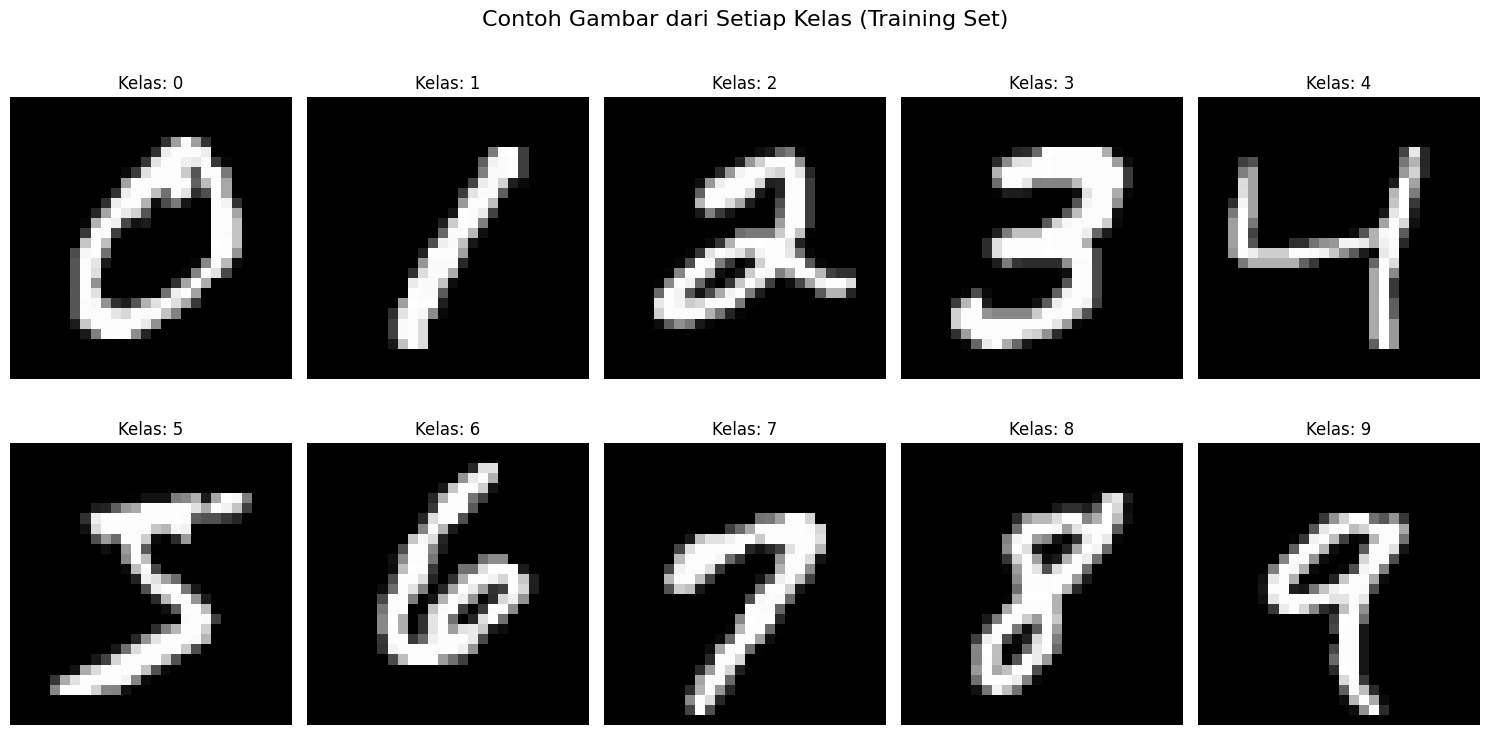

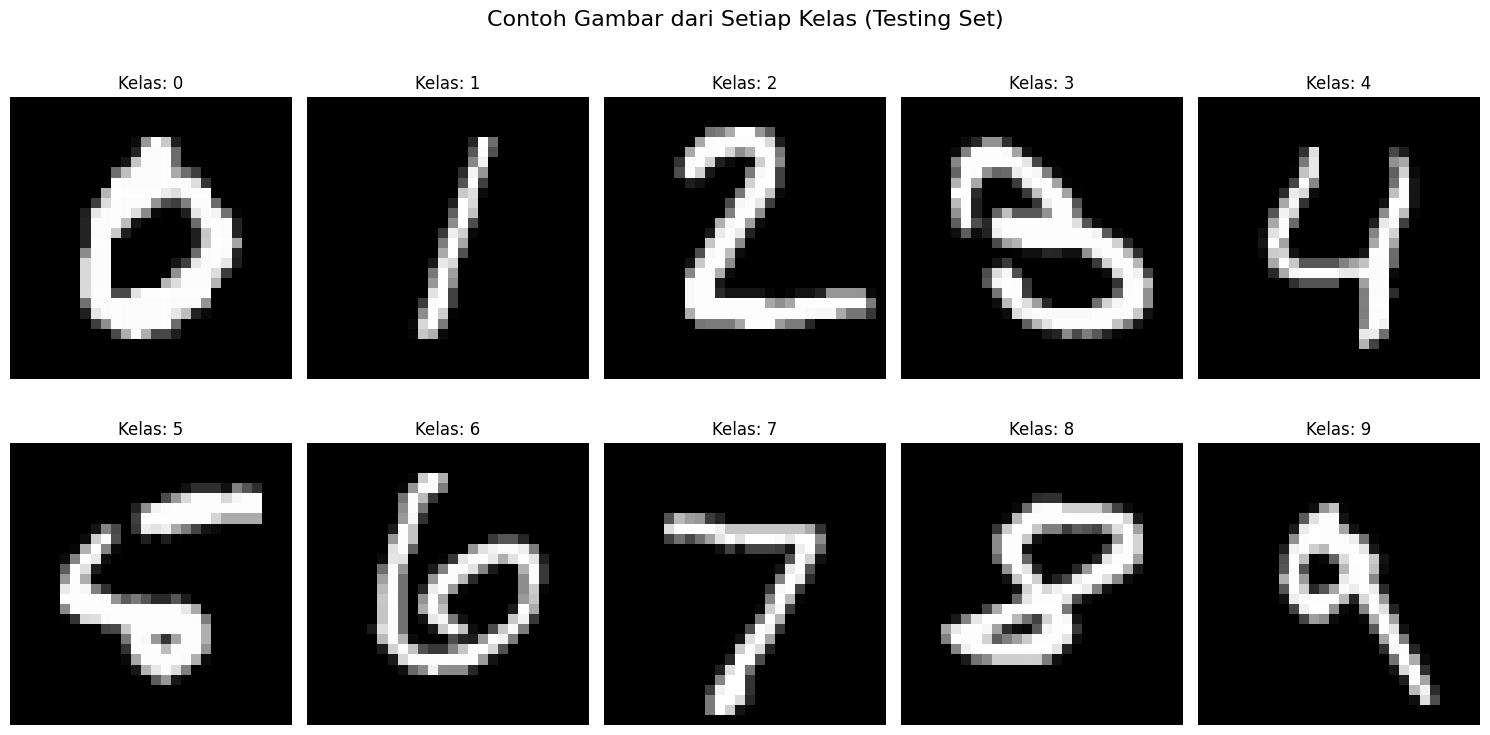

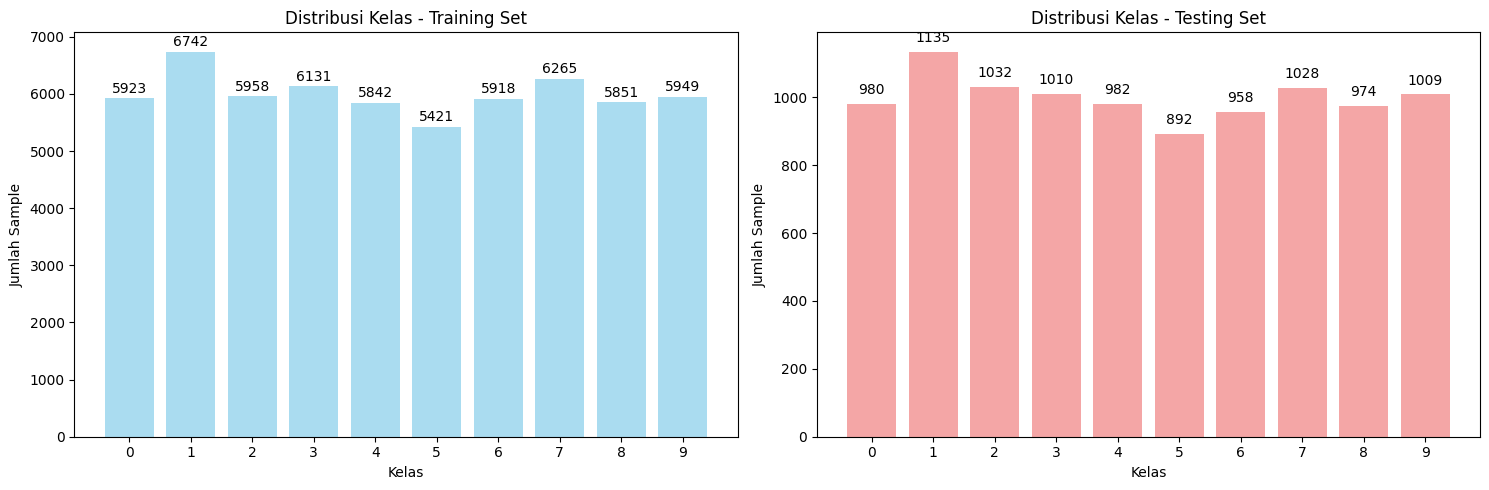

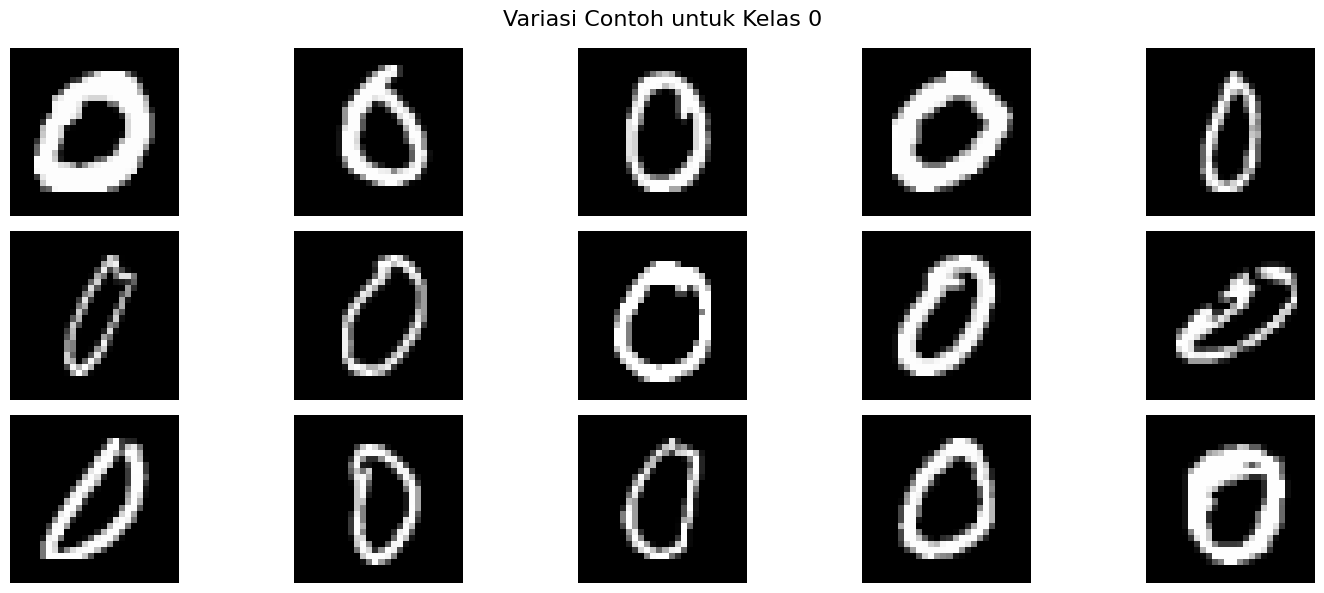

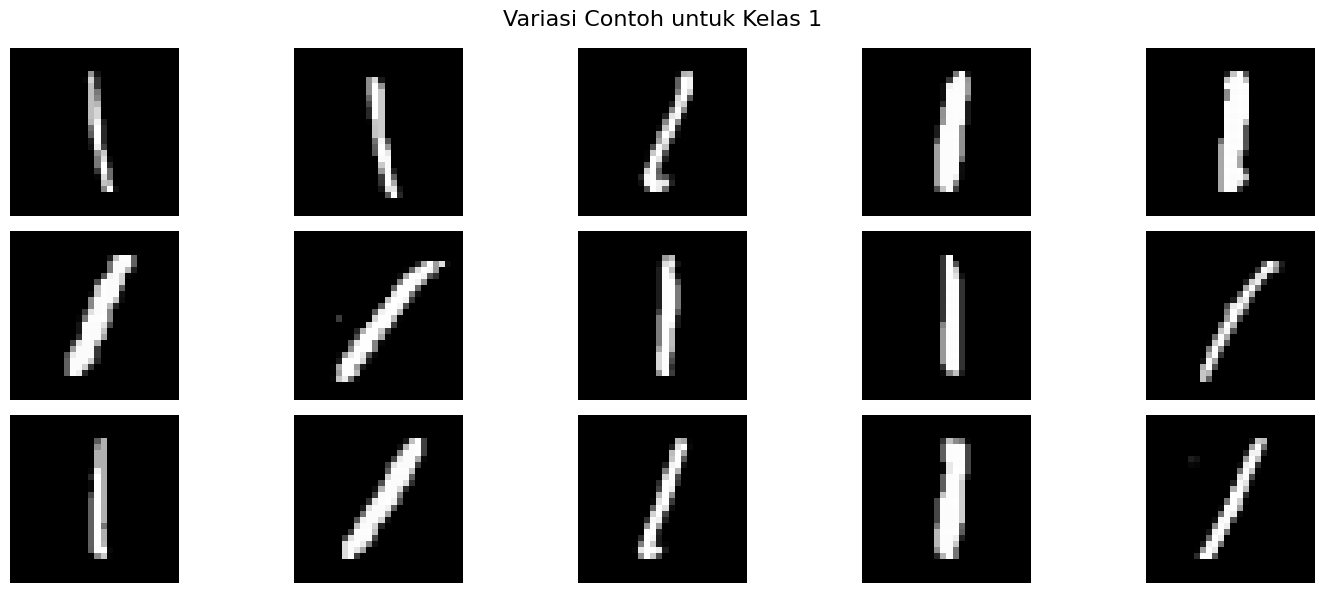

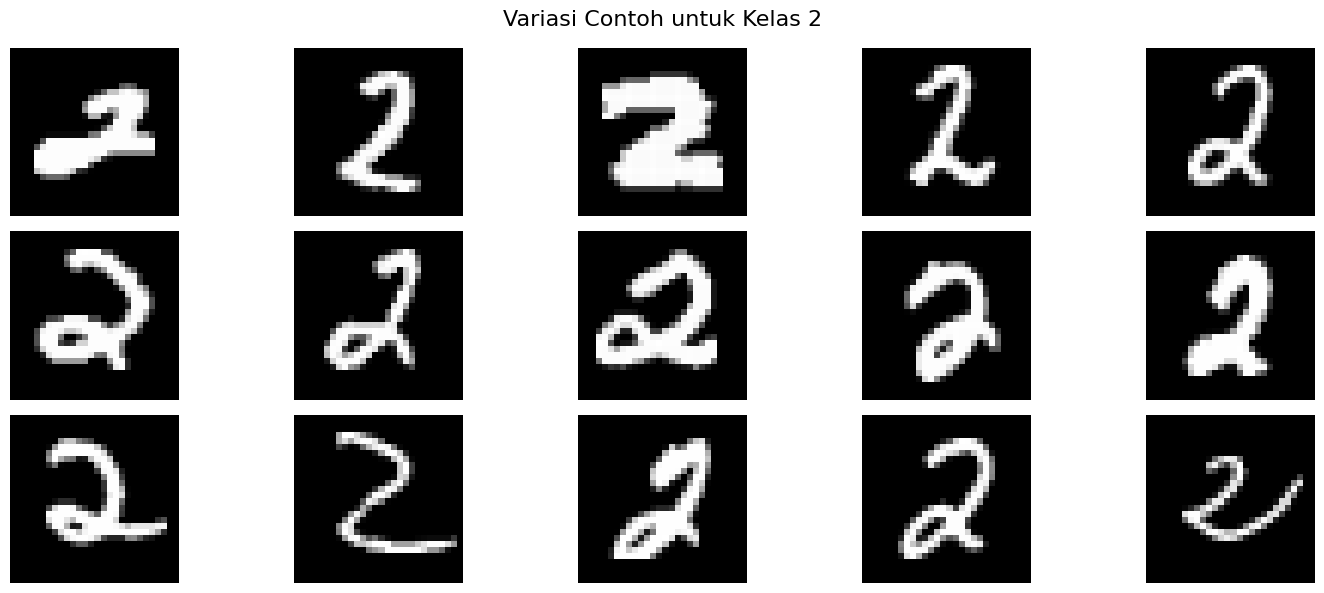

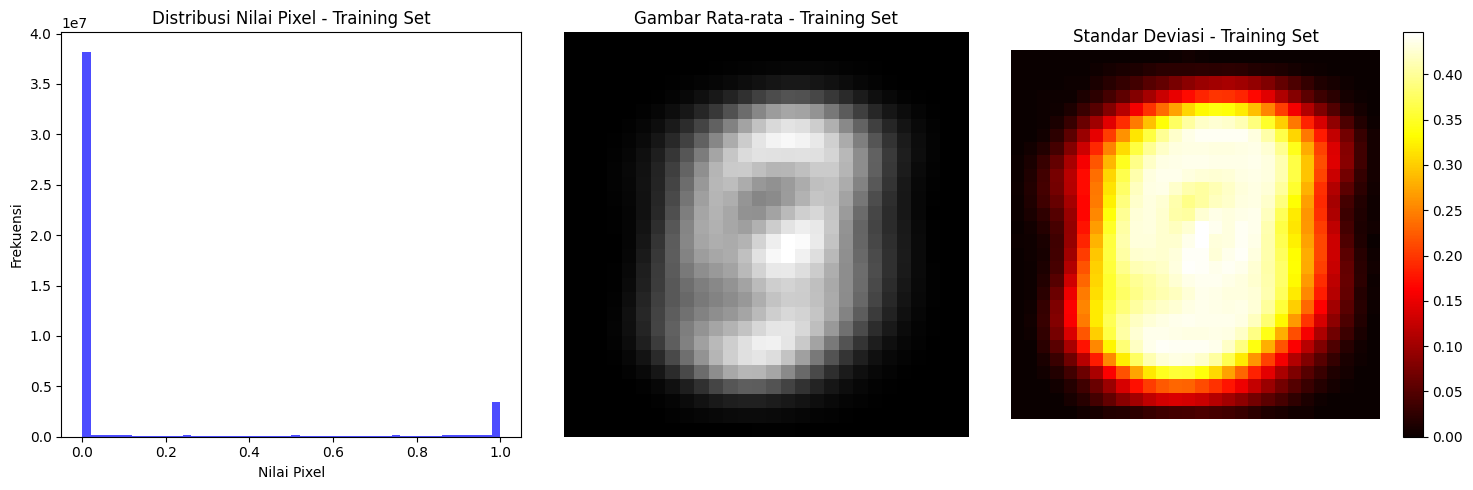

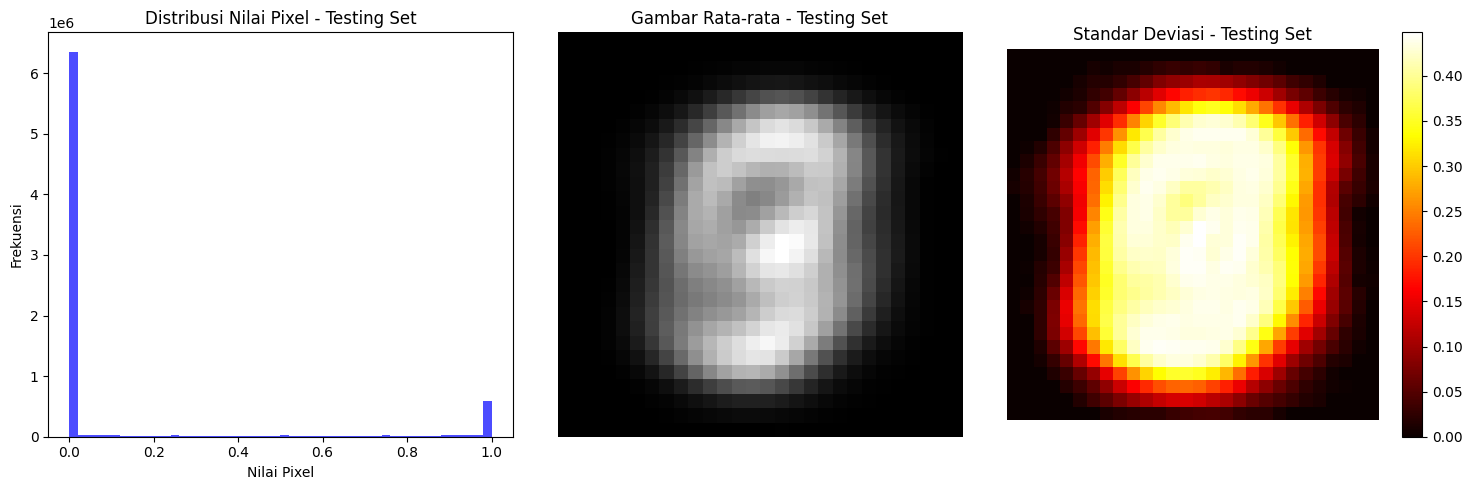

In [3]:
# Visualisasi contoh gambar dari setiap kelas
def visualize_mnist_samples(x_data, y_data, title):
    plt.figure(figsize=(15, 8))

    # Ambil satu contoh dari setiap kelas
    class_examples = {}
    for i in range(len(y_data)):
        label = y_data[i]
        if label not in class_examples:
            class_examples[label] = x_data[i]
        if len(class_examples) == 10:
            break

    # Plot contoh dari setiap kelas
    for i in range(10):
        plt.subplot(2, 5, i+1)
        plt.imshow(class_examples[i].reshape(28, 28), cmap='gray')
        plt.title(f'Kelas: {i}')
        plt.axis('off')

    plt.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()

# Visualisasi training set
visualize_mnist_samples(x_train.reshape(-1, 28, 28), y_train,
                       'Contoh Gambar dari Setiap Kelas (Training Set)')

# Visualisasi testing set
visualize_mnist_samples(x_test.reshape(-1, 28, 28), y_test,
                       'Contoh Gambar dari Setiap Kelas (Testing Set)')

# Visualisasi distribusi kelas
def plot_class_distribution(y_train, y_test):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

    # Training distribution
    train_counts = [np.sum(y_train == i) for i in range(10)]
    ax1.bar(range(10), train_counts, color='skyblue', alpha=0.7)
    ax1.set_title('Distribusi Kelas - Training Set')
    ax1.set_xlabel('Kelas')
    ax1.set_ylabel('Jumlah Sample')
    ax1.set_xticks(range(10))

    # Add value labels on bars
    for i, count in enumerate(train_counts):
        ax1.text(i, count + 50, str(count), ha='center', va='bottom')

    # Test distribution
    test_counts = [np.sum(y_test == i) for i in range(10)]
    ax2.bar(range(10), test_counts, color='lightcoral', alpha=0.7)
    ax2.set_title('Distribusi Kelas - Testing Set')
    ax2.set_xlabel('Kelas')
    ax2.set_ylabel('Jumlah Sample')
    ax2.set_xticks(range(10))

    # Add value labels on bars
    for i, count in enumerate(test_counts):
        ax2.text(i, count + 20, str(count), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

plot_class_distribution(y_train, y_test)

# Visualisasi variasi dalam satu kelas
def visualize_class_variations(x_data, y_data, target_class=5, num_samples=15):
    # Filter data untuk kelas tertentu
    class_indices = np.where(y_data == target_class)[0]
    selected_indices = np.random.choice(class_indices, num_samples, replace=False)

    plt.figure(figsize=(15, 6))
    plt.suptitle(f'Variasi Contoh untuk Kelas {target_class}', fontsize=16)

    for i, idx in enumerate(selected_indices):
        plt.subplot(3, 5, i+1)
        plt.imshow(x_data[idx].reshape(28, 28), cmap='gray')
        plt.axis('off')

    plt.tight_layout()
    plt.show()

# Visualisasi variasi untuk beberapa kelas
for class_id in [0, 1, 2]:
    visualize_class_variations(x_train.reshape(-1, 28, 28), y_train, class_id)

# Analisis statistik pixel values
def analyze_pixel_statistics(x_data, title):
    plt.figure(figsize=(15, 5))

    # Histogram pixel values
    plt.subplot(1, 3, 1)
    plt.hist(x_data.flatten(), bins=50, alpha=0.7, color='blue')
    plt.title(f'Distribusi Nilai Pixel - {title}')
    plt.xlabel('Nilai Pixel')
    plt.ylabel('Frekuensi')

    # Mean image
    plt.subplot(1, 3, 2)
    mean_image = np.mean(x_data, axis=0)
    plt.imshow(mean_image.reshape(28, 28), cmap='gray')
    plt.title(f'Gambar Rata-rata - {title}')
    plt.axis('off')

    # Standard deviation image
    plt.subplot(1, 3, 3)
    std_image = np.std(x_data, axis=0)
    plt.imshow(std_image.reshape(28, 28), cmap='hot')
    plt.title(f'Standar Deviasi - {title}')
    plt.axis('off')
    plt.colorbar()

    plt.tight_layout()
    plt.show()

analyze_pixel_statistics(x_train, 'Training Set')
analyze_pixel_statistics(x_test, 'Testing Set')

Data setelah split:
x_train_split: (48000, 28, 28, 1)
y_train_split: (48000, 10)
x_val: (12000, 28, 28, 1)
y_val: (12000, 10)
x_test: (10000, 28, 28, 1)
y_test_categorical: (10000, 10)


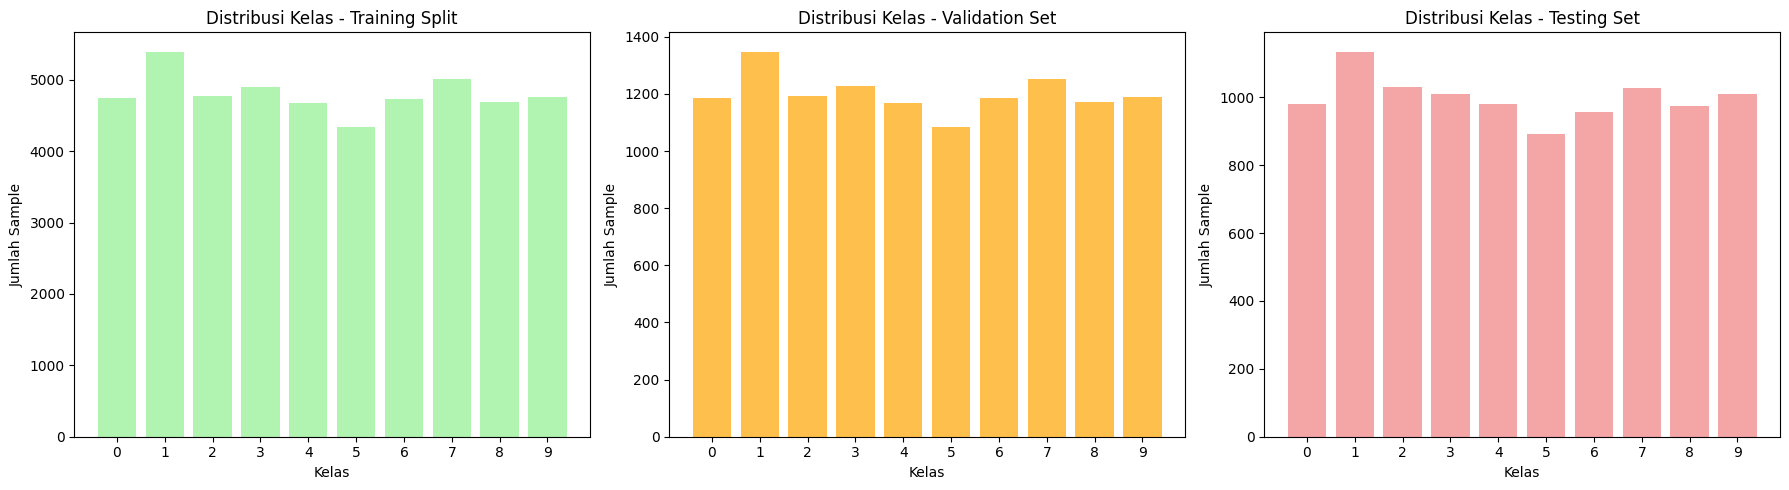

In [4]:
# Pembagian data training dan validation
from sklearn.model_selection import train_test_split

# Split data training menjadi training dan validation set
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train_categorical, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Data setelah split:")
print(f"x_train_split: {x_train_split.shape}")
print(f"y_train_split: {y_train_split.shape}")
print(f"x_val: {x_val.shape}")
print(f"y_val: {y_val.shape}")
print(f"x_test: {x_test.shape}")
print(f"y_test_categorical: {y_test_categorical.shape}")

# Konversi kembali ke label integer untuk stratifikasi
y_train_int = np.argmax(y_train_split, axis=1)
y_val_int = np.argmax(y_val, axis=1)

# Cek distribusi kelas setelah split
def check_split_distribution(y_train_int, y_val_int, y_test):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))

    # Training distribution
    train_counts = [np.sum(y_train_int == i) for i in range(10)]
    ax1.bar(range(10), train_counts, color='lightgreen', alpha=0.7)
    ax1.set_title('Distribusi Kelas - Training Split')
    ax1.set_xlabel('Kelas')
    ax1.set_ylabel('Jumlah Sample')
    ax1.set_xticks(range(10))

    # Validation distribution
    val_counts = [np.sum(y_val_int == i) for i in range(10)]
    ax2.bar(range(10), val_counts, color='orange', alpha=0.7)
    ax2.set_title('Distribusi Kelas - Validation Set')
    ax2.set_xlabel('Kelas')
    ax2.set_ylabel('Jumlah Sample')
    ax2.set_xticks(range(10))

    # Test distribution
    test_counts = [np.sum(y_test == i) for i in range(10)]
    ax3.bar(range(10), test_counts, color='lightcoral', alpha=0.7)
    ax3.set_title('Distribusi Kelas - Testing Set')
    ax3.set_xlabel('Kelas')
    ax3.set_ylabel('Jumlah Sample')
    ax3.set_xticks(range(10))

    plt.tight_layout()
    plt.show()

check_split_distribution(y_train_int, y_val_int, y_test)

In [20]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

print("Membuat Model CNN dari Nol...")

# Definisikan model CNN sequential
model_a = models.Sequential([
    # Blok Konvolusi Pertama: Menangkap fitur dasar seperti edges dan corners
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1), name='conv1'),
    layers.MaxPooling2D((2,2), name='pool1'),  # Reduksi dimensi, meningkatkan invariance
    layers.Dropout(0.25, name='drop1'),        # Regularisasi untuk mencegah overfitting

    # Blok Konvolusi Kedua: Menangkap pola yang lebih kompleks
    layers.Conv2D(64, (3,3), activation='relu', name='conv2'),
    layers.MaxPooling2D((2,2), name='pool2'),
    layers.Dropout(0.25, name='drop2'),

    # Blok Konvolusi Ketiga: Menangkap fitur high-level
    layers.Conv2D(64, (3,3), activation='relu', name='conv3'),
    layers.Dropout(0.25, name='drop3'),

    # Transition dari feature maps ke vektor
    layers.Flatten(name='flatten'),

    # Fully Connected Layers untuk klasifikasi
    layers.Dense(128, activation='relu', name='dense1'),
    layers.Dropout(0.5, name='drop4'),
    layers.Dense(10, activation='softmax', name='output')  # Output 10 classes
])

# Kompilasi model dengan optimizer dan loss function
model_a.compile(
    optimizer='adam',  # Adaptive Moment Estimation - optimizer yang efisien
    loss='categorical_crossentropy',  # Suitable untuk multi-class classification
    metrics=['accuracy']
)

# Tampilkan summary arsitektur
print("\nArsitektur Model CNN:")
model_a.summary()

Membuat Model CNN dari Nol...

Arsitektur Model CNN:


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1 (Conv2D)                  │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling2D)            │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv2D)                  │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling2D)            │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv2D)                  │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop4 (Dropout)                 │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output (Dense)                  │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [21]:
# Definisi callbacks untuk meningkatkan kualitas training
callbacks = [
    # Early stopping: menghentikan training ketika validation loss tidak membaik
    tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    # ReduceLROnPlateau: mengurangi learning rate ketika stagnasi
    tf.keras.callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        verbose=1
    )
]

print("Memulai Proses Training Model CNN...")
print(f"Data Training: {x_train.shape[0]} samples")
print(f"Data Validation: {x_test.shape[0]} samples")
print(f"Batch Size: 128")
print(f"Maximum Epochs: 20")

# Proses training model
history_a = model_a.fit(
    x_train,
    y_train_categorical,
    batch_size=128,           # Update weights setiap 128 samples
    epochs=20,                # Maksimum iterasi melalui dataset
    validation_data=(x_test, y_test_categorical),  # Validasi menggunakan test set
    callbacks=callbacks,      # Callbacks untuk optimasi training
    verbose=1                 # Tampilkan progress bar
)

print("Training Model CNN Selesai!")

Memulai Proses Training Model CNN...
Data Training: 60000 samples
Data Validation: 10000 samples
Batch Size: 128
Maximum Epochs: 20
Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 35s 71ms/step - accuracy: 0.7055 - loss: 0.8712 - val_accuracy: 0.9796 - val_loss: 0.0662 - learning_rate: 0.0010
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.9633 - loss: 0.1253 - val_accuracy: 0.9871 - val_loss: 0.0385 - learning_rate: 0.0010
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 70ms/step - accuracy: 0.9737 - loss: 0.0877 - val_accuracy: 0.9883 - val_loss: 0.0341 - learning_rate: 0.0010
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 34s 73ms/step - accuracy: 0.9795 - loss: 0.0687 - val_accuracy: 0.9896 - val_loss: 0.0312 - learning_rate: 0.0010
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 33s 69ms/step - accuracy: 0.9821 - loss: 0.0609 - val_accuracy: 0.9916 - val_loss: 0.0257 - learning_rate: 0.0010
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 70ms/step - accuracy: 0.9839 - loss: 0.0558 - val_accu

In [22]:
# Evaluasi komprehensif pada test set
print("\n" + "="*60)
print("EVALUASI MODEL PADA TEST SET")
print("="*60)

# Evaluasi menggunakan built-in method
test_loss, test_acc = model_a.evaluate(x_test, y_test_categorical, verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

# Prediksi pada seluruh test set
y_pred = model_a.predict(x_test, verbose=0)
y_pred_classes = np.argmax(y_pred, axis=1)

# Hitung accuracy menggunakan sklearn untuk konfirmasi
from sklearn.metrics import accuracy_score
test_accuracy = accuracy_score(y_test, y_pred_classes)
print(f"Confirmed Accuracy: {test_accuracy:.4f}")

# Analisis distribusi confidence
confidences = np.max(y_pred, axis=1)
print(f"\nAnalisis Confidence:")
print(f"Rata-rata Confidence: {np.mean(confidences):.4f}")
print(f"Std Confidence: {np.std(confidences):.4f}")
print(f"Min Confidence: {np.min(confidences):.4f}")
print(f"Max Confidence: {np.max(confidences):.4f}")


EVALUASI MODEL PADA TEST SET
Test Loss: 0.0198
Test Accuracy: 0.9946
Confirmed Accuracy: 0.9946

Analisis Confidence:
Rata-rata Confidence: 0.9952
Std Confidence: 0.0364
Min Confidence: 0.4406
Max Confidence: 1.0000


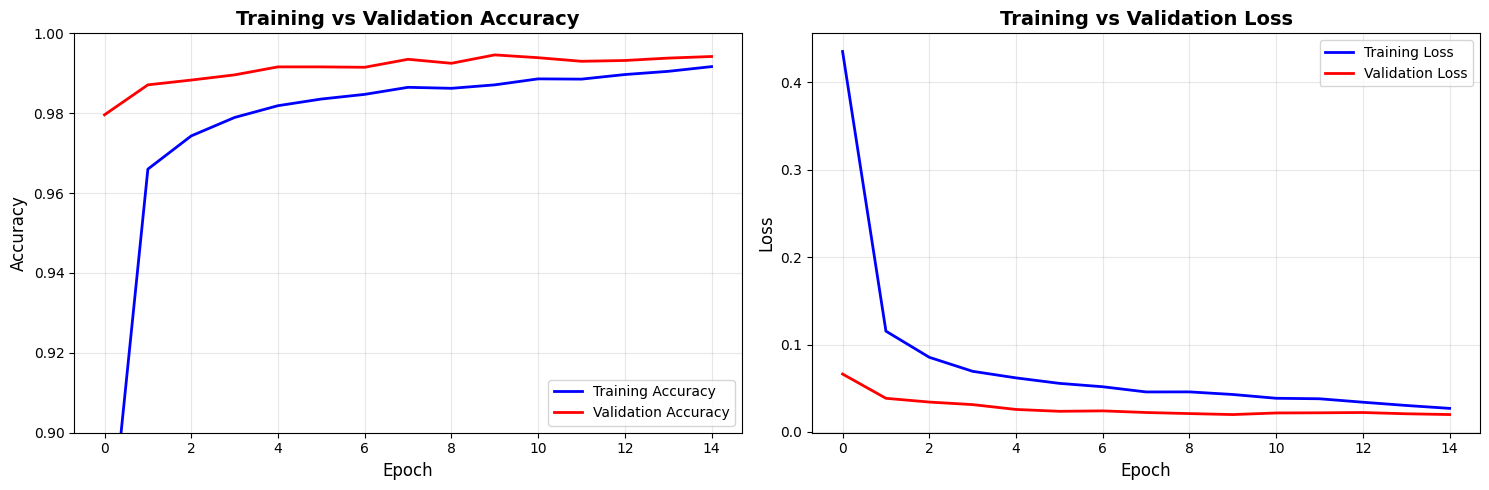


Final Training Accuracy: 0.9917
Final Validation Accuracy: 0.9942
Gap Training-Validation: 0.0025


In [23]:
# Visualisasi training history
plt.figure(figsize=(15, 5))

# Plot 1: Training dan Validation Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_a.history['accuracy'],
         label='Training Accuracy',
         linewidth=2,
         color='blue')
plt.plot(history_a.history['val_accuracy'],
         label='Validation Accuracy',
         linewidth=2,
         color='red')
plt.title('Training vs Validation Accuracy', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.ylim(0.9, 1.0)

# Plot 2: Training dan Validation Loss
plt.subplot(1, 2, 2)
plt.plot(history_a.history['loss'],
         label='Training Loss',
         linewidth=2,
         color='blue')
plt.plot(history_a.history['val_loss'],
         label='Validation Loss',
         linewidth=2,
         color='red')
plt.title('Training vs Validation Loss', fontsize=14, fontweight='bold')
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisis convergence
final_train_acc = history_a.history['accuracy'][-1]
final_val_acc = history_a.history['val_accuracy'][-1]
print(f"\nFinal Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Gap Training-Validation: {abs(final_train_acc - final_val_acc):.4f}")


Visualisasi Contoh Prediksi pada Test Set:


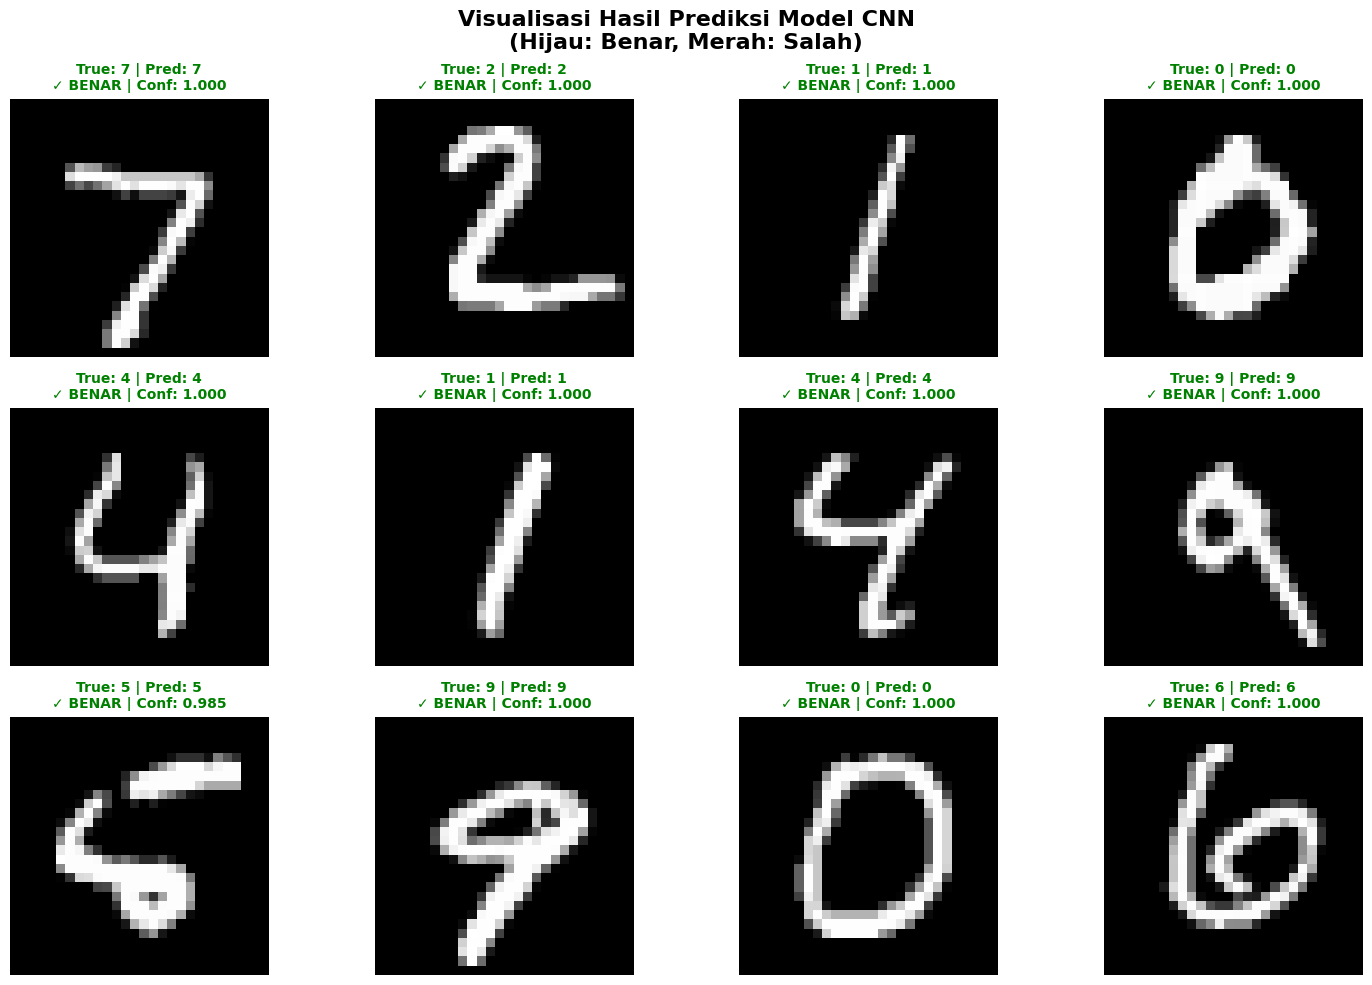

Accuracy pada 12 sample: 100.00%


In [24]:
# Fungsi untuk visualisasi prediksi
def visualize_predictions(model, x_data, y_true, num_samples=12):
    """
    Visualisasi prediksi model pada sample gambar
    """
    # Prediksi pada sample
    predictions = model.predict(x_data[:num_samples], verbose=0)
    pred_classes = np.argmax(predictions, axis=1)
    pred_confidences = np.max(predictions, axis=1)

    # Buat plot
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(3, 4, i+1)
        plt.imshow(x_data[i].reshape(28, 28), cmap='gray')

        # Tentukan warna berdasarkan benar/salah prediksi
        if pred_classes[i] == y_true[i]:
            color = 'green'
            result_text = "✓ BENAR"
        else:
            color = 'red'
            result_text = "✗ SALAH"

        plt.title(f'True: {y_true[i]} | Pred: {pred_classes[i]}\n{result_text} | Conf: {pred_confidences[i]:.3f}',
                 color=color,
                 fontsize=10,
                 fontweight='bold')
        plt.axis('off')

    plt.suptitle('Visualisasi Hasil Prediksi Model CNN\n(Hijau: Benar, Merah: Salah)',
                fontsize=16,
                fontweight='bold')
    plt.tight_layout()
    plt.show()

    # Hitung accuracy pada sample yang ditampilkan
    sample_accuracy = np.sum(pred_classes == y_true[:num_samples]) / num_samples
    print(f"Accuracy pada {num_samples} sample: {sample_accuracy:.2%}")

print("\nVisualisasi Contoh Prediksi pada Test Set:")
visualize_predictions(model_a, x_test, y_test, num_samples=12)

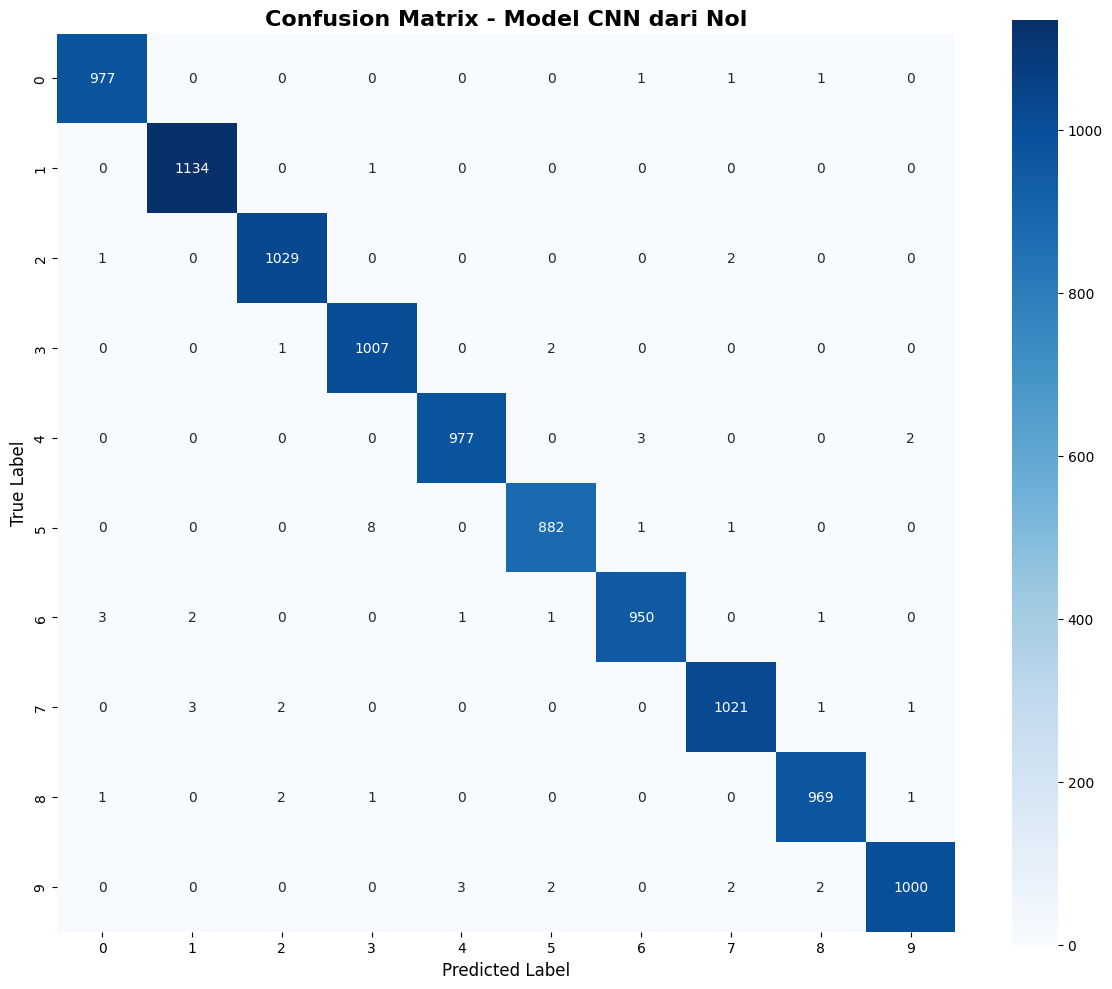


Analisis Performa per Kelas:
Kelas 0: 977/980 (99.69%)
Kelas 1: 1134/1135 (99.91%)
Kelas 2: 1029/1032 (99.71%)
Kelas 3: 1007/1010 (99.70%)
Kelas 4: 977/982 (99.49%)
Kelas 5: 882/892 (98.88%)
Kelas 6: 950/958 (99.16%)
Kelas 7: 1021/1028 (99.32%)
Kelas 8: 969/974 (99.49%)
Kelas 9: 1000/1009 (99.11%)


In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm,
            annot=True,
            fmt='d',
            cmap='Blues',
            cbar=True,
            square=True,
            annot_kws={"size": 10})
plt.title('Confusion Matrix - Model CNN dari Nol',
          fontsize=16,
          fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

# Analisis class-wise performance
print("\nAnalisis Performa per Kelas:")
for i in range(10):
    true_positives = cm[i,i]
    total_actual = np.sum(cm[i,:])
    class_accuracy = true_positives / total_actual if total_actual > 0 else 0
    print(f"Kelas {i}: {true_positives}/{total_actual} ({class_accuracy:.2%})")

Testing visualisasi feature maps...
=== VISUALISASI FEATURE MAPS ===


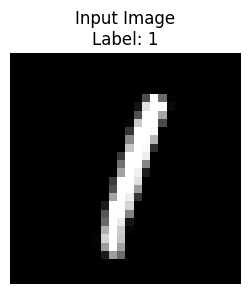

Ditemukan 3 layer convolutional
Menggunakan layer: conv1 (index: 0)
Shape feature maps: (1, 26, 26, 32)


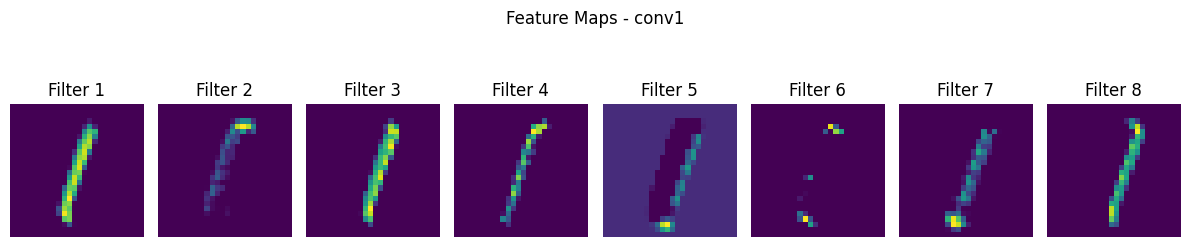

In [29]:
# Versi yang benar-benar fix untuk visualisasi feature maps
def visualize_features_working(model, image_index=0):
    """
    Visualisasi feature maps yang pasti bekerja
    """
    print("=== VISUALISASI FEATURE MAPS ===")

    # Pastikan model sudah dipakai untuk predict sekali
    _ = model.predict(x_test[:1], verbose=0)

    # Pilih sample image
    sample_image = x_test[image_index]
    true_label = y_test[image_index]

    # Tampilkan gambar asli
    plt.figure(figsize=(3, 3))
    plt.imshow(sample_image.reshape(28, 28), cmap='gray')
    plt.title(f'Input Image\nLabel: {true_label}')
    plt.axis('off')
    plt.show()

    # Cari layer convolutional
    conv_layers = []
    for i, layer in enumerate(model.layers):
        if 'conv' in layer.name:
            conv_layers.append((i, layer))

    print(f"Ditemukan {len(conv_layers)} layer convolutional")

    if not conv_layers:
        print("Tidak ada layer convolutional")
        return

    # Visualisasi hanya layer pertama untuk simplicity
    layer_idx, first_conv = conv_layers[0]
    print(f"Menggunakan layer: {first_conv.name} (index: {layer_idx})")

    # Buat model baru dari awal
    input_layer = tf.keras.Input(shape=(28, 28, 1))
    x = input_layer

    # Rebuild model sampai layer yang diinginkan
    for i in range(layer_idx + 1):
        x = model.layers[i](x)

    # Buat feature model
    feature_model = tf.keras.Model(inputs=input_layer, outputs=x)

    # Get feature maps
    feature_maps = feature_model.predict(sample_image.reshape(1, 28, 28, 1), verbose=0)
    print(f"Shape feature maps: {feature_maps.shape}")

    # Tampilkan feature maps
    num_filters = min(8, feature_maps.shape[-1])

    plt.figure(figsize=(12, 3))
    for i in range(num_filters):
        plt.subplot(1, num_filters, i+1)
        feature_map = feature_maps[0, :, :, i]
        plt.imshow(feature_map, cmap='viridis')
        plt.title(f'Filter {i+1}')
        plt.axis('off')

    plt.suptitle(f'Feature Maps - {first_conv.name}')
    plt.tight_layout()
    plt.show()

# Test
print("Testing visualisasi feature maps...")
visualize_features_working(model_a, image_index=5)

In [27]:
# Simpan model untuk penggunaan future
model_a.save('model_cnn_mnist.h5')
print("Model berhasil disimpan sebagai 'model_cnn_mnist.h5'")

# Ringkasan komprehensif performa model
print("\n" + "="*70)
print("RINGKASAN AKHIR - MODEL CNN DARI NOL")
print("="*70)
print(f"🟢 Arsitektur: 3x Conv2D + MaxPooling + 2x Dense")
print(f"🟢 Total Parameters: {model_a.count_params():,}")
print(f"🟢 Test Accuracy: {test_accuracy:.4f} ({test_accuracy*100:.2f}%)")
print(f"🟢 Test Loss: {test_loss:.4f}")
print(f"🟢 Final Training Accuracy: {final_train_acc:.4f}")
print(f"🟢 Final Validation Accuracy: {final_val_acc:.4f}")
print(f"🟢 Generalization Gap: {abs(final_train_acc - final_val_acc):.4f}")

# Analisis kualitas model
if test_accuracy > 0.99:
    print("🟢 STATUS: Excellent Performance")
elif test_accuracy > 0.95:
    print("🟡 STATUS: Good Performance")
else:
    print("🔴 STATUS: Needs Improvement")

print("="*70)

Model berhasil disimpan sebagai 'model_cnn_mnist.h5'

RINGKASAN AKHIR - MODEL CNN DARI NOL
🟢 Arsitektur: 3x Conv2D + MaxPooling + 2x Dense
🟢 Total Parameters: 130,890
🟢 Test Accuracy: 0.9946 (99.46%)
🟢 Test Loss: 0.0198
🟢 Final Training Accuracy: 0.9917
🟢 Final Validation Accuracy: 0.9942
🟢 Generalization Gap: 0.0025
🟢 STATUS: Excellent Performance
